<a href="https://colab.research.google.com/github/iciromaco/Semi3A/blob/master/L5/col510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

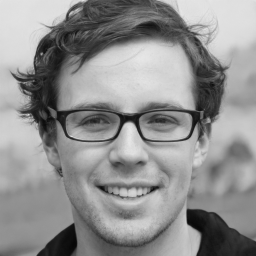

原画像


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# jupyter notebook, google colab でない場合は下の1行はコメントアウト
%matplotlib inline

fname = "prof.png" # 入力ファイル名
src = cv2.imread(fname,0)
cv2_imshow(src)
print("原画像")

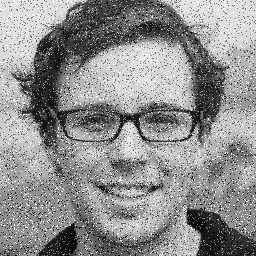

ノイズ付加画像


In [0]:
# ノイズの付加
def addGaussianNoise(src):
    row,col= src.shape
    gauss = np.random.randint(0,110,(row,col))
    gauss[gauss<100] = 0
    noisy = src + gauss
    gauss = np.random.randint(0,110,(row,col))
    gauss[gauss<100] = 0
    noisy = noisy - gauss
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    noisy = noisy.astype(np.uint8)
    return noisy

src_img = addGaussianNoise(src)
cv2_imshow(src_img)
print("ノイズ付加画像")

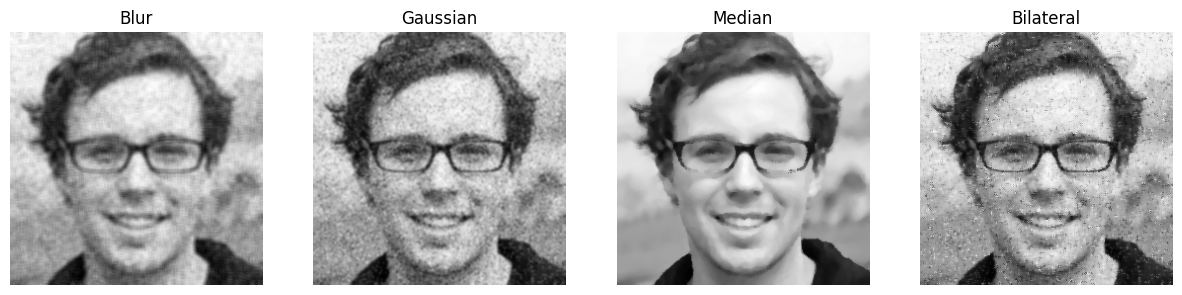

In [0]:
dst_img = [np.array(src_img.shape) for i in range(4)]
# dst_img[]は src_img と同じサイズの画像配列４つ分の配列
dst_img[0] = cv2.blur(src_img,(5,5))
dst_img[1] = cv2.GaussianBlur(src_img,(5,5),1.0)
dst_img[2] = cv2.medianBlur(src_img,5)
dst_img[3] = cv2.bilateralFilter(src_img,5,75,75)

from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,6
rcParams['figure.dpi'] = 100
def plotimg(pos,label,img):
    plt.subplot(pos)
    plt.axis("off")
    plt.title(label)
    plt.imshow(img,cmap="gray")
    
plotimg(141,"Blur",dst_img[0])
plotimg(142,"Gaussian",dst_img[1])
plotimg(143,"Median",dst_img[2])
plotimg(144,"Bilateral",dst_img[3])